# 1. Introduction

Welcome to this notebook where we will venture into the world of Machine Learning with one of its simplest, yet powerful techniques: Linear Regression. Here, we will predict the median price of homes in various Boston neighborhoods, using the widely-used Boston Housing dataset. This is a regression task, meaning we are trying to predict a continuous value (house prices) rather than a discrete label (e.g., spam or not-spam). Let's dive right in!

# 2. Importing the Necessary Libraries

As a good practice, we always start by importing all the libraries we'll need at the top. This makes it clear what our dependencies are, and ensures we have everything we need before we start coding.

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,accuracy_score

# 3. Loading the Dataset

Now, let's load the Boston Housing dataset.

In [3]:
data = pd.read_csv("../data/iris.csv")

## Column Definitions:
- Id = Id of a row
- SepalLengthCm = Length in Cm of the Sepal
- SepalWidthCm = Width in Cm of the Sepal
- PetalLengthCm = Length in Cm of the Petal
- PetalWidthCm = Width in Cm of the Petal
- Species = Species fo the observed flower

# 4. Preprocessing for EDA ( if necessary )

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 5. Exploratory Data Analysis ( EDA )

Before we dive into modeling, it's a good idea to explore our dataset. This can include looking at the raw data, checking for missing values, visualizing the distributions of variables, and understanding the relationships between different variables. See at `cheatsheets/EDA.md` for a Cheat Sheet on all the basic things to look for.

In [6]:
# Get the number of rows and columns
print('Shape:', data.shape)

# Display the first few rows of the dataset
print('First few entries:')
print(data.head())

Shape: (150, 6)
First few entries:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
# Get descriptive statistics
print('Descriptive Statistics:')
print(data.describe())

Descriptive Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [10]:
# Check for missing values
print('Missing Values:')
print(data.isnull().sum())

Missing Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [11]:
# Check data types of each column
print('Data Types:')
print(data.dtypes)

Data Types:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [12]:
# Get unique values for each column (useful for categorical data)
print('Unique values:')
for col in data.columns:
    print(col, ':', len(data[col].unique()))

Unique values:
Id : 150
SepalLengthCm : 35
SepalWidthCm : 23
PetalLengthCm : 43
PetalWidthCm : 22
Species : 3


In [14]:
# Get numeric columns from iris dataset
numeric_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
numeric_data = data[numeric_columns]

# Generate a correlation matrix
print('Correlation Matrix:')
print(numeric_data.corr())

Correlation Matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


<Axes: >

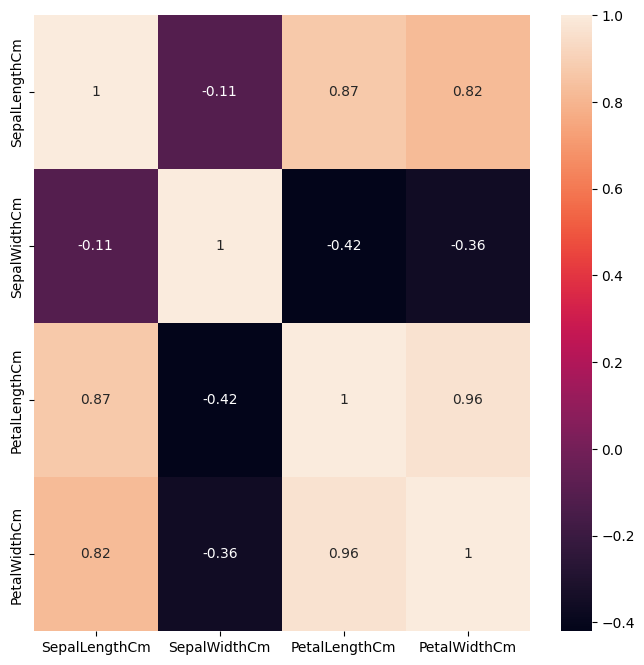

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(numeric_data.corr(), annot=True, ax=ax)

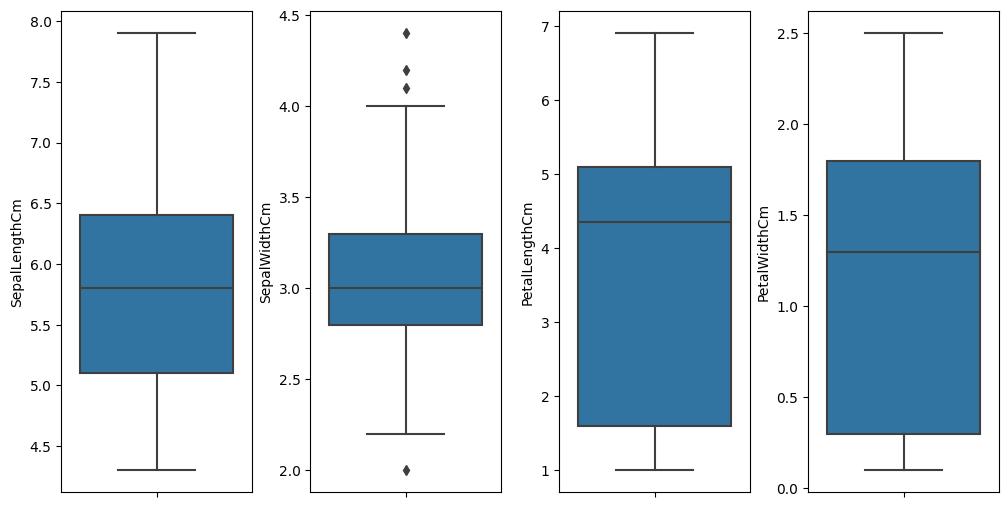

In [19]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(10,5))
index = 0
axs = axs.flatten()
for k, v in numeric_data.items():
    sns.boxplot(y=k, data=numeric_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=.4, w_pad=.5, h_pad=1)

In [27]:
z_scores = zscore(data["SepalWidthCm"])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
filtered_data = data[filtered_entries]
print("Shape difference between original data and filtered data: ", data.shape[0] - filtered_data.shape[0])

Shape difference between original data and filtered data:  1


In [28]:
numeric_data.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

<Axes: xlabel='Species', ylabel='Count'>

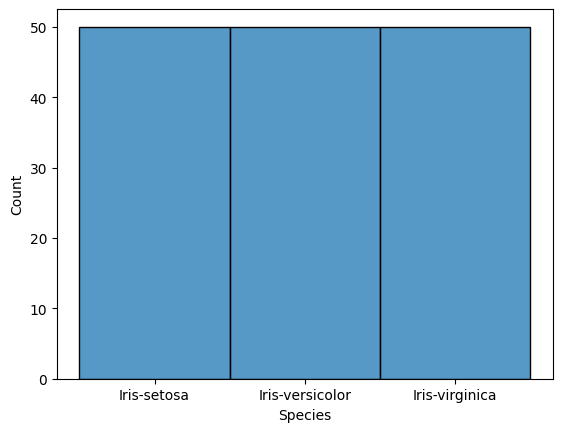

In [31]:
# Check for categorical imbalance in Species
sns.histplot(x="Species", data=data)

# 6. Data Preprocessing

Before we dive into modeling, it's a good idea to explore our dataset. This can include looking at the raw data, checking for missing values, visualizing the distributions of variables, and understanding the relationships between different variables. See at `cheatsheets/Preprocessing.md` for a Cheat Sheet on all the basic things to look for.

In [29]:
# Delete unnecessary column Id
data.drop('Id', axis=1, inplace=True)

In [33]:
# Create X and y from data
X = data.drop(columns=['Species'])
y = data['Species']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [36]:
# Standard Scaler for X
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode y
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# 7. Model Implementation

Finally, we come to the heart of our notebook: implementing the Linear Regression model! We'll fit the model to our training data and make predictions on our testing data.

In [44]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
y_prob = decision_tree.predict_proba(X_test)

# 8. Model Evaluation

After we've made our predictions, we need to evaluate how well our model did. This will usually involve some sort of error metric, like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE).

In [41]:
decision_tree.score(X_test, y_test)

1.0

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [45]:
roc_auc_score(y_test, y_prob, average='macro', multi_class='ovo')

1.0

<Axes: >

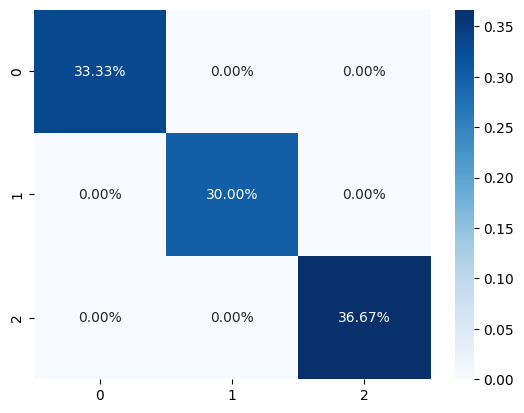

In [47]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# 9. Conclusion

In this final section, we'll recap what we've done and learned in this notebook. We might also discuss what we could do in future projects or how we could improve our current model.

Remember, these are just guidelines. Your notebook should reflect your own style and approach to data science. The most important thing is that your notebook is clear, logical, and informative. Happy coding!

Note: You can insert these section headings into your Jupyter notebook by changing a cell's type to "Markdown" and typing in the text. You can run a markdown cell in the same way you'd run a code cell (Shift+Enter).

--- Conclusion ---